In [ ]:
%pip install numpy scipy scikit-learn matplotlib networkx

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import networkx as nx
from scipy.linalg import eigh

In [3]:
def load_graph(file_path, weighted=False):
    if weighted:
        graph = nx.read_edgelist(file_path, delimiter=",", data=[('weight', float)])
    else:
        graph = nx.read_edgelist(file_path, delimiter=",")
    return graph

In [4]:
file_path = "example1.dat"
graph = load_graph(file_path)
graph

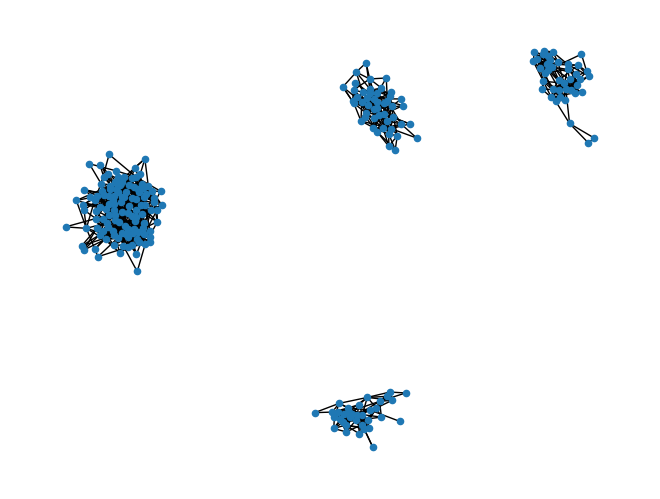

In [5]:
nx.draw(graph, node_size=20)

In [6]:
def build_affinity_matrix(edges, num_nodes, sigma=20):
    A = np.zeros((num_nodes, num_nodes))
    for i, j in edges:
        i = int(i)
        j = int(j)
        if i != j:
            dist = np.linalg.norm(i - j)  # Compute distance
            A[i - 1, j - 1] = np.exp(-dist ** 2 / (2 * sigma ** 2))
            A[j - 1, i - 1] = A[i - 1, j - 1]  # Symmetric matrix
    return A

In [7]:
num_nodes = np.unique(np.asarray(graph)).shape[0]
num_nodes


241

In [8]:
A = build_affinity_matrix(nx.edges(graph), num_nodes)
A

array([[0.        , 0.99875078, 0.99501248, ..., 0.        , 0.        ,
        0.        ],
       [0.99875078, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99501248, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [9]:
def construct_diagonal(A):
    return np.diag(np.sum(A, axis=1))

In [10]:
D = construct_diagonal(A)
D

array([[5.88983971, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.45540604, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.19402755, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.93560054, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 3.25298177,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.79126769]])

In [11]:
def construct_L(A, D):
    D_inv_sqrt = np.diag(1 / np.sqrt(np.diag(D)))
    L = D_inv_sqrt @ A @ D_inv_sqrt
    return L

In [12]:
L = construct_L(A, D)
L

array([[0.        , 0.2213889 , 0.22940742, ..., 0.        , 0.        ,
        0.        ],
       [0.2213889 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22940742, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
def get_eigen(L):
    eigvals, eigvecs = eigh(L)
    return eigvals, eigvecs

In [14]:
k = 4
eigvals, eigvecs = get_eigen(L)
X = eigvecs[:, num_nodes - k:]
X

array([[ 0.        ,  0.        ,  0.        ,  0.11756393],
       [ 0.        ,  0.        ,  0.        ,  0.09004755],
       [ 0.        ,  0.        ,  0.        ,  0.08657484],
       [ 0.        ,  0.        ,  0.        ,  0.09926276],
       [ 0.        ,  0.        ,  0.        ,  0.11453482],
       [ 0.        ,  0.        ,  0.        ,  0.09505493],
       [ 0.        ,  0.        ,  0.        ,  0.04736457],
       [ 0.        ,  0.        ,  0.        ,  0.107794  ],
       [ 0.        ,  0.        ,  0.        ,  0.11501   ],
       [ 0.        ,  0.        ,  0.        ,  0.0923137 ],
       [ 0.        ,  0.        ,  0.        ,  0.1328416 ],
       [ 0.        ,  0.        ,  0.        ,  0.11576517],
       [ 0.        ,  0.        ,  0.        ,  0.13842227],
       [ 0.        ,  0.        ,  0.        ,  0.10135015],
       [ 0.        ,  0.        ,  0.        ,  0.16757159],
       [ 0.        ,  0.        ,  0.        ,  0.13682337],
       [ 0.        ,  0.

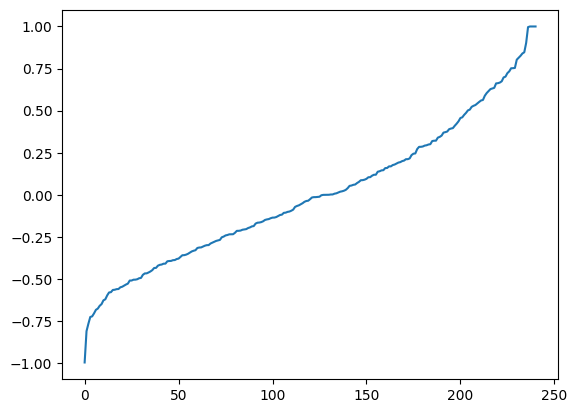

In [15]:
plt.plot(eigvals)
plt.show()

In [16]:
def renormalize_rows(X):
    return X / np.linalg.norm(X, axis=1, keepdims=True)

In [17]:
Y = renormalize_rows(X)
Y

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  

In [18]:
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(Y)

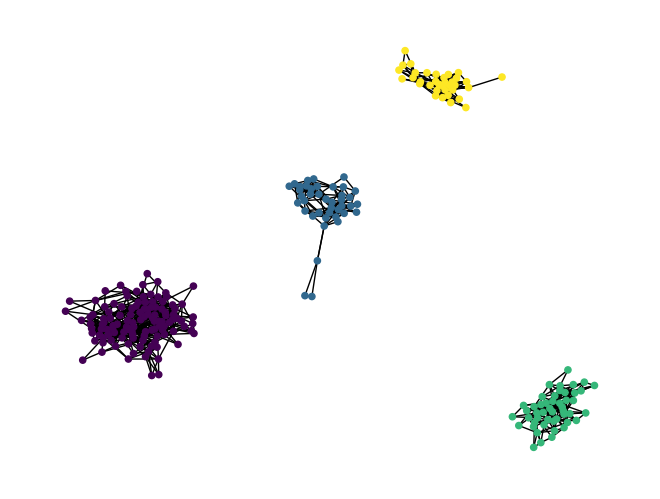

In [19]:
nx.draw(graph, node_size=20, node_color=clusters)

In [20]:
A3 = np.zeros([num_nodes, num_nodes])
for i, j in nx.edges(graph):
    i = int(i)
    j = int(j)
    A3[i-1, j-1] = 1  
    A3[j-1, i-1] = 1  

In [21]:
D3 = np.diag(np.sum(A3, axis=1))

In [22]:
L3 = D3 - A3
L3

array([[ 7., -1., -1., ...,  0.,  0.,  0.],
       [-1.,  8.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  9., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  5.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  2.]])

In [23]:
eigvals3, eigvecs3 = eigh(L3)

In [24]:
FV = eigvecs3[:, 1]

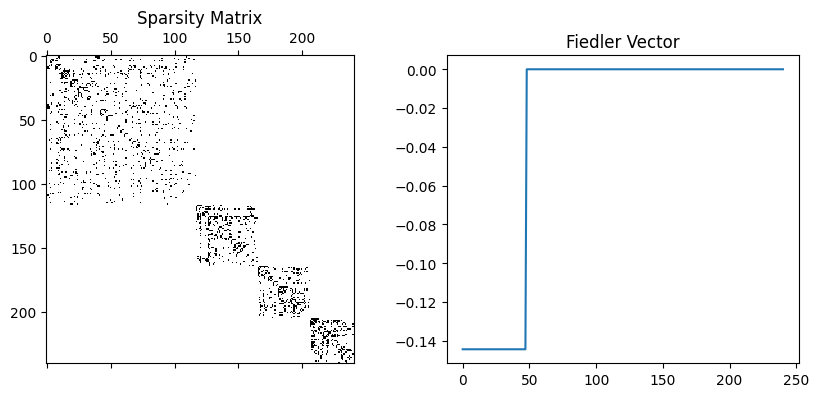

In [25]:
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A) 
plt.title('Sparsity Matrix')
plt.subplot(1,2,2)
plt.plot(np.sort(FV))
plt.title('Fiedler Vector')
plt.show()

In [26]:
file_path2 = "example2.dat"
graph2 = load_graph(file_path2, weighted=True)
graph2

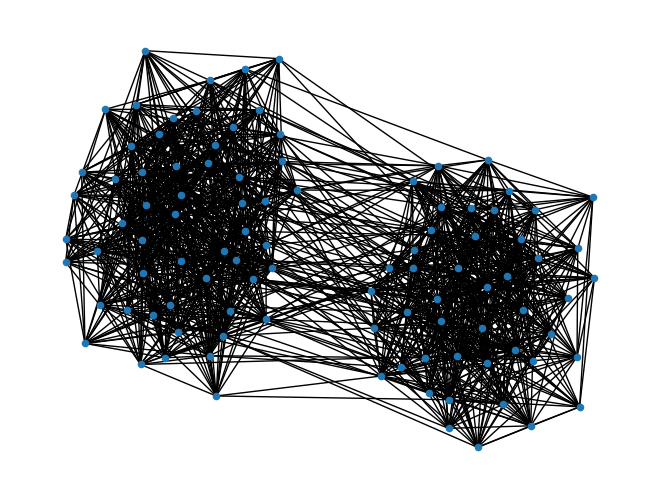

In [27]:
nx.draw(graph2, node_size=20)

In [28]:
num_nodes2 = np.unique(np.asarray(graph2)).shape[0]
num_nodes2

100

In [29]:
A2 = build_affinity_matrix(nx.edges(graph2), num_nodes2, sigma=3.5)
A2

array([[0.00000000e+000, 9.60005441e-001, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [9.60005441e-001, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.04735500e-160, 4.30893143e-164, 1.63377650e-167],
       ...,
       [0.00000000e+000, 0.00000000e+000, 1.04735500e-160, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 4.30893143e-164, ...,
        0.00000000e+000, 0.00000000e+000, 9.60005441e-001],
       [0.00000000e+000, 0.00000000e+000, 1.63377650e-167, ...,
        0.00000000e+000, 9.60005441e-001, 0.00000000e+000]])

In [30]:
D2 = construct_diagonal(A2)
D2

array([[1.04054647, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.73917026, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.25456775, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.13533711, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.74282652,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.59764702]])

In [31]:
L2 = construct_L(A2, D2)
L2

array([[0.00000000e+000, 5.68634807e-001, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [5.68634807e-001, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.89606762e-160, 2.17375632e-164, 8.60836319e-168],
       ...,
       [0.00000000e+000, 0.00000000e+000, 1.89606762e-160, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 2.17375632e-164, ...,
        0.00000000e+000, 0.00000000e+000, 5.75315662e-001],
       [0.00000000e+000, 0.00000000e+000, 8.60836319e-168, ...,
        0.00000000e+000, 5.75315662e-001, 0.00000000e+000]])

In [32]:
k2 = 2
eigvals2, eigvecs2 = get_eigen(L2)
X2 = eigvecs2[:, num_nodes2 - k2:]
X2

array([[ 0.13268387, -0.07718705],
       [ 0.21590089, -0.12523428],
       [ 0.201702  , -0.11361753],
       [ 0.18184303, -0.10403326],
       [ 0.10989136, -0.06375083],
       [ 0.19285938, -0.10807314],
       [ 0.19861639, -0.11105798],
       [ 0.19310806, -0.12057499],
       [ 0.19168684, -0.11997319],
       [ 0.19871325, -0.12507355],
       [ 0.17450347, -0.09710443],
       [ 0.12599081, -0.08078154],
       [ 0.13402247, -0.08549937],
       [ 0.12449089, -0.06916656],
       [ 0.1071592 , -0.07094911],
       [ 0.09230891, -0.07371629],
       [ 0.05395112, -0.03825521],
       [ 0.13937842, -0.09374353],
       [ 0.1720634 , -0.12820102],
       [ 0.17073445, -0.12626341],
       [ 0.18971358, -0.14039875],
       [ 0.04832527, -0.0516964 ],
       [ 0.18224578, -0.13265071],
       [ 0.11822191, -0.08822184],
       [ 0.14781429, -0.10860879],
       [ 0.15261333, -0.11371567],
       [ 0.02000727, -0.01954972],
       [-0.00578649, -0.08841127],
       [ 0.09274705,

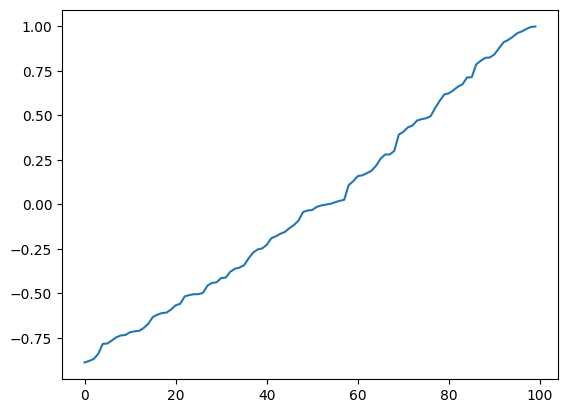

In [33]:
plt.plot(eigvals2)
plt.show()

In [34]:
Y2 = renormalize_rows(X2)
Y2

array([[ 0.86437903, -0.50284083],
       [ 0.86501074, -0.50175334],
       [ 0.87127977, -0.49078667],
       [ 0.86799022, -0.49658129],
       [ 0.86498389, -0.50179962],
       [ 0.87236737, -0.48885087],
       [ 0.87281907, -0.48804392],
       [ 0.84823028, -0.52962759],
       [ 0.84766242, -0.53053597],
       [ 0.84631388, -0.53268454],
       [ 0.87382107, -0.48624761],
       [ 0.84182387, -0.53975232],
       [ 0.84305593, -0.5378259 ],
       [ 0.87414252, -0.48566949],
       [ 0.83380709, -0.55205592],
       [ 0.7814088 , -0.62401946],
       [ 0.81574029, -0.57841834],
       [ 0.82977761, -0.55809419],
       [ 0.80188972, -0.59747207],
       [ 0.80402219, -0.5945993 ],
       [ 0.80382022, -0.59487231],
       [ 0.68288674, -0.73052426],
       [ 0.80850743, -0.58848597],
       [ 0.80144439, -0.5980693 ],
       [ 0.80585441, -0.59211373],
       [ 0.80187333, -0.59749406],
       [ 0.71523794, -0.69888102],
       [-0.06530994, -0.99786503],
       [ 0.74878449,

In [35]:
kmeans2 = KMeans(n_clusters=k2, random_state=42)
clusters2 = kmeans2.fit_predict(Y2)

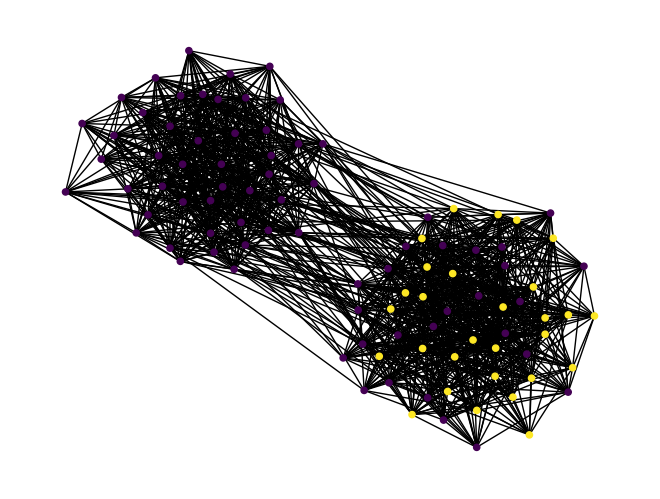

In [36]:
nx.draw(graph2, node_size=20, node_color=clusters2)

In [37]:
A4 = np.zeros([num_nodes2, num_nodes2])
for i, j in nx.edges(graph2):
    i = int(i)
    j = int(j)
    A4[i-1, j-1] = 1  
    A4[j-1, i-1] = 1  

In [38]:
D4 = np.diag(np.sum(A4, axis=1))

In [39]:
L4 = D4 - A4
L4

array([[23., -1.,  0., ...,  0.,  0.,  0.],
       [-1., 17.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 26., ..., -1., -1., -1.],
       ...,
       [ 0.,  0., -1., ..., 17.,  0.,  0.],
       [ 0.,  0., -1., ...,  0., 23., -1.],
       [ 0.,  0., -1., ...,  0., -1., 33.]])

In [40]:
eigvals4, eigvecs4 = eigh(L4)

In [41]:
FV2 = eigvecs4[:, 1]

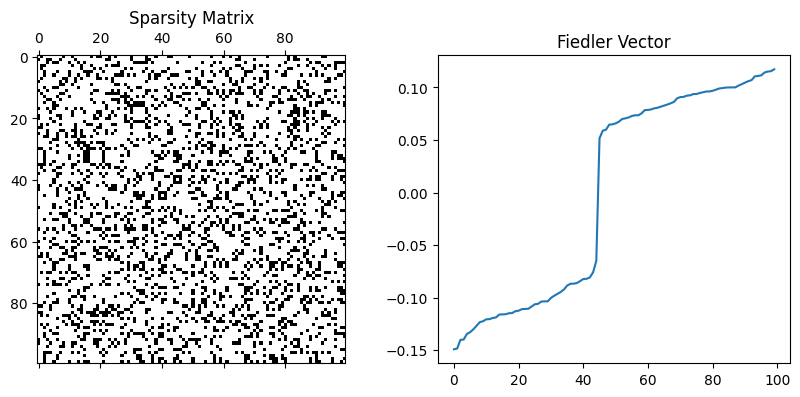

In [42]:
fig=plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.spy(A2) 
plt.title('Sparsity Matrix')
plt.subplot(1,2,2)
plt.plot(np.sort(FV2))
plt.title('Fiedler Vector')
plt.show()